## This notebook is an optional accompaniment to the Day 2 Statistics Short-Course

## Hypothesis test example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')  # a nice style for plots
plt.rcParams.update({'font.size': 14})  # use bigger font size than default

###  Motivating question for Hypothesis Test

FiveThirtyEight.com polled the American public and found that 32% are “very worried” about CoVid-19 infection.
You have a large social network, and you asked 100 of your friends if they are “very worried” about CoVid-19 infection.  26 of them said yes.  Are your results statistically different from FiveThirtyEight’s results?*

*Assume that your friends’ demographics are similar to those polled by FiveThirtyEight.

#### Hypothesis testing steps
1. Define your hypotheses.
2. Define your significance level (how willing are you to incorrecty reject the Null hypothesis?)
3. Compute the probability of your results (or more extreme results) under the Null hypothesis.
4. Compare this probability to your significance level and come to a conclusion.
   - "Reject" or "fail to reject" the null hypothesis.


**Step 1: Define the hypotheses**<br>
H0: The proportion of my friends that are very worried is equal to the US proportion that is very worried.<br>
    p_vw_friends = p_vw_US = 32%

H1: The proportion of my friends that are not worried is **not equal** to the US proportion that is very worried.<br>
    p_vw_friends =/= p_vw_US
    
Proportions are made from a series of independent Bernouilli trials:<br>
Ask Person 1:  "Are you very worried about Covid19 infection? Yes or no?"<br>
Ask Person 2:  "Are you very worried about Covid19 infection? Yes or no?"<br>
and so on...<br>

The number of "successes" (Yes) we get in the number of trials (questions) is Binomially distributed.

0.11801580470499529


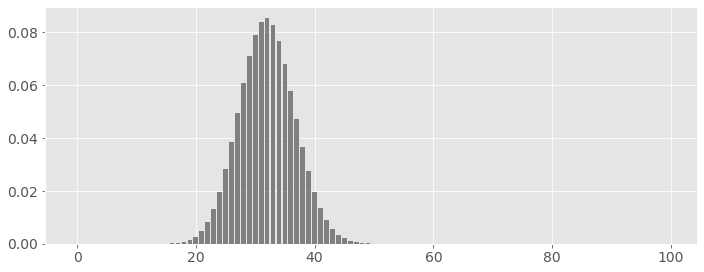

In [2]:
n = 100    # we asked 100 of our friends
p = 0.32   # the national average
binomial = stats.binom(n=n, p=p)
print(binomial.cdf(26))

fig, ax = plt.subplots(1, figsize=(10, 4))
ax.bar(range(n), [binomial.pmf(i) for i in range(n)], color="grey")
ax.set_xlabel = "# very worried people"
ax.set_ylabel = "probability"
plt.tight_layout()

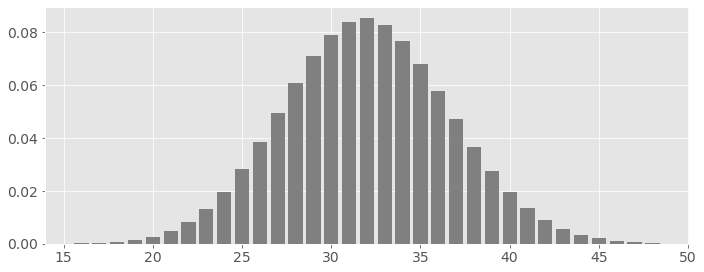

In [3]:
# subset the limits
rng = list(range(16,49))
fig, ax = plt.subplots(1, figsize=(10, 4))
ax.bar(rng, [binomial.pmf(i) for i in rng], color="grey")
ax.set_xlabel = "# very worried people"
ax.set_ylabel = "probability"
plt.tight_layout()

In [4]:
p_16 = binomial.pmf(16)
print(f"Probability of 16 saying very worried {p_16:0.4f}.")
p_32 = binomial.pmf(32)
print(f"Probability of 32 saying very worried {p_32:0.4f}.")
p_26 = binomial.pmf(26)
print(f"Probability of 26 saying very worried {p_26:0.4f}.")

Probability of 16 saying very worried 0.0001.
Probability of 32 saying very worried 0.0853.
Probability of 26 saying very worried 0.0384.


In [5]:
p_up_to_26 = binomial.cdf(26)
p_up_to_26

0.11801580470499529

## Bayesian Inference example

### The Beta Distribution: $\text{Beta}(\alpha, \beta)$

The beta distribution has two hyper-parameters (also known as "shape parameters"):
- $\alpha > 0$: we will use this to encode the number of "successes" of a website (more on that later)
- $\beta > 0$: we will use this to encode the number of "failures" of a website (more on that later)

Support: $x \in [0, 1]$

PDF: $f(x) = \dfrac{x^{\alpha - 1} (1-x)^{\beta - 1}}{B(\alpha, \beta)}$

where $B(\alpha, \beta) = \dfrac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$

where $\Gamma(x)$ is an extension of the factorial function which works for a wider range of input (like any positive real value, which is why it works here).

**Get a feel for the Beta Distribution:**

Let's plot a few Beta Distributions (with varying shape parameters). Notice the support of each distribution is $x \in [0, 1]$.

In [6]:
def plot_beta(alpha, beta, ax, title=None, label=None, xticks=[0.0, 0.5, 1.0]):

    # Build a beta distribtuion scipy object.
    dist = stats.beta(alpha, beta)

    # The support (always this for the beta dist).
    x = np.linspace(0.0, 1.0, 201)

    # The probability density at each sample support value.
    y = dist.pdf(x)

    # Plot it all.
    lines = ax.plot(x, y, label=label)
    ax.fill_between(x, y, alpha=0.2, color=lines[0].get_c())
    if title: 
        ax.set_title(title)
    ax.get_yaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([np.max(y)])
    ax.get_xaxis().set_ticks(xticks)
    ax.set_ylim(0.0, np.max(y)*1.2)

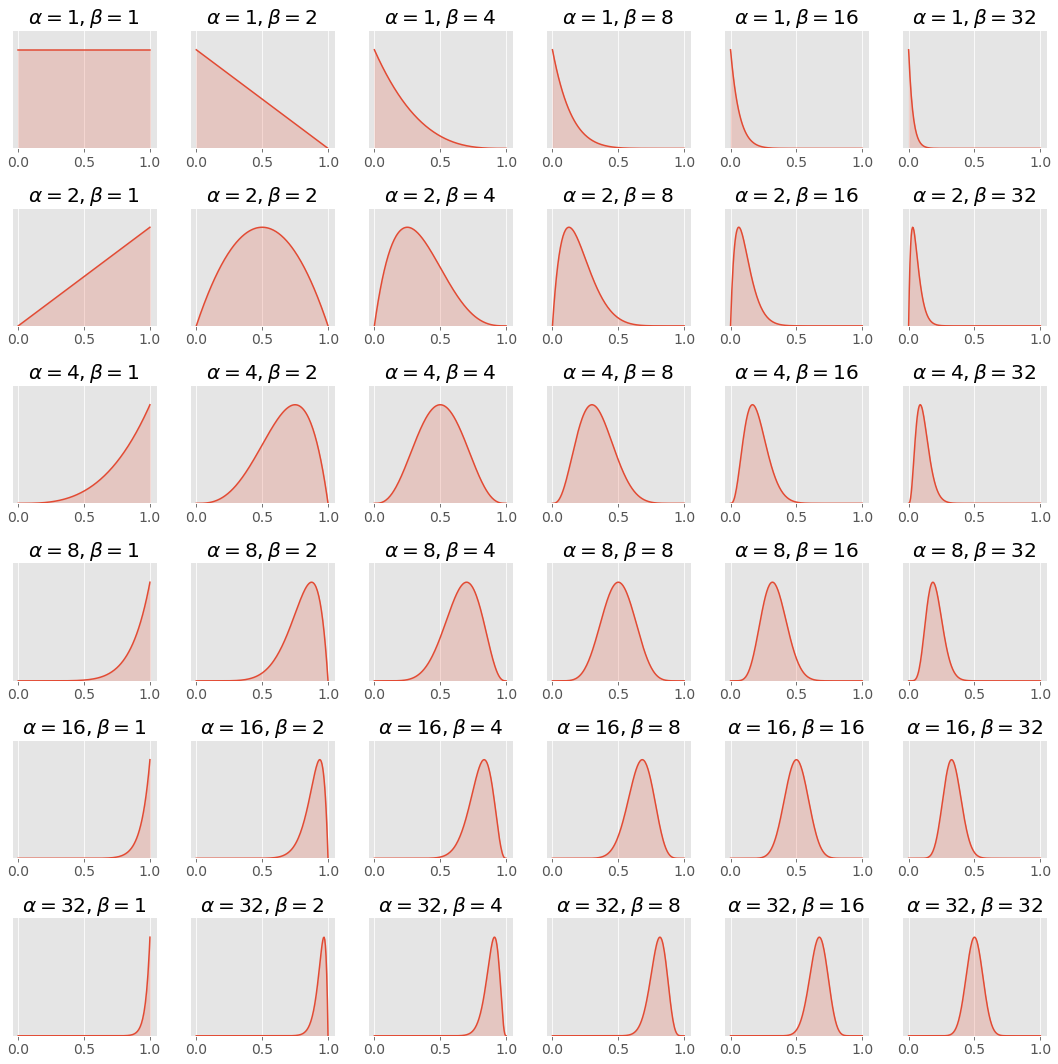

In [7]:
# The shape parameters.
alpha_values = [1, 2, 4, 8, 16, 32]  
beta_values  = [1, 2, 4, 8, 16, 32]
n_rows, n_cols = len(alpha_values), len(beta_values)
alpha_beta_pairs = ( (i, j) for i in alpha_values for j in beta_values )

# Create a large figure - nice way to do it.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Plot each beta dist. One plot per pair of shape params.
for (alpha, beta), ax in zip(alpha_beta_pairs, axes.flatten()):
    plot_beta(alpha, beta, ax, r"$\alpha={} ,  \beta={}$".format(alpha, beta))

plt.tight_layout()

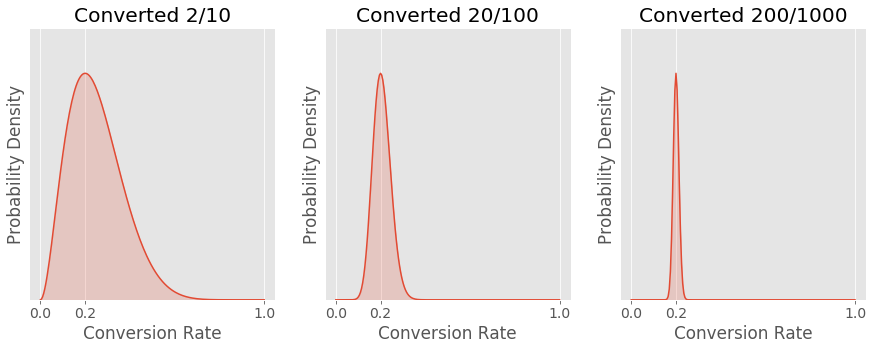

In [8]:
def get_beta_dist_params(website_samples):
    website_samples = np.array(website_samples)
    num_conversions = website_samples.sum()
    total_visitors = len(website_samples)
    alpha = num_conversions + 1
    beta = (total_visitors - num_conversions) + 1
    mean = 1. * num_conversions / total_visitors
    return alpha, beta, mean, num_conversions, total_visitors

def plot_ctr_website(website_samples, ax, label=None):
    alpha, beta, mean, num_conversions, total_visitors = get_beta_dist_params(website_samples)
    title = None if label else r"Converted {}/{}".format(num_conversions, total_visitors)
    plot_beta(alpha, beta, ax, title, label, [0.0, mean, 1.0])
    ax.set_xlabel("Conversion Rate")
    ax.set_ylabel("Probability Density")

fig, (left, mid, right) = plt.subplots(1, 3, figsize=(15, 5))

plot_ctr_website([0, 1, 0, 0, 0]*2, left)    # only 10 clicks
plot_ctr_website([0, 1, 0, 0, 0]*20, mid)    # 100 clicks
plot_ctr_website([0, 1, 0, 0, 0]*200, right) # 1000 clicks